<a href="https://colab.research.google.com/github/pkumarth/ml/blob/master/svm_ch3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import os
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from mpl_toolkits.mplot3d import Axes3D
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import datasets

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
np.random.seed(42)

In [0]:
m=50
X=2* np.random.rand(m,1)
y=(4+ 3*X + np.random.randn(m,1)).ravel()

In [0]:
svm_reg =LinearSVR(epsilon=1.5 ,random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [0]:
svm_reg1 = LinearSVR(epsilon =1.5 ,random_state =42)
svm_reg2 = LinearSVR(epsilon =0.5 ,random_state =42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [0]:
def find_support_vectors(svm_reg,X,y):
  y_pred = svm_reg.predict(X)
  off_margin=(np.abs(y-y_pred) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

In [0]:
svm_reg1.support_ = find_support_vectors(svm_reg1,X,y)
svm_reg2.support_ = find_support_vectors(svm_reg2,X,y)



In [0]:
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
eps_y_pred

array([6.52640746])

In [0]:
def plot_svm_regression(svm_reg ,X, y, axes):
  xls = np.linspace(axes[0],axes[1],100).reshape(100,1)
  y_pred = svm_reg.predict(xls)

  plt.plot(xls, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
  plt.plot(xls, y_pred + svm_reg.epsilon, "k--")
  plt.plot(xls, y_pred - svm_reg.epsilon, "k--")

  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X, y, "bo")
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.legend(loc="upper left", fontsize=18)
  plt.axis(axes)

Saving figure svm_regression_plot


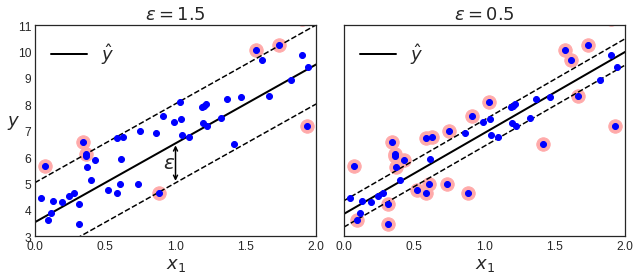

In [0]:
fig ,axes = plt.subplots(ncols =2 ,figsize =(9,4) ,sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1 , X, y ,[0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)


plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()


In [0]:
np.random.seed(42)
m=100
X = 2 * np.random.rand(m,1) -1
y= (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [0]:
svm_poly_reg = SVR(kernel ="poly" ,degree =2 ,C=100 ,epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Saving figure svm_with_polynomial_kernel_plot


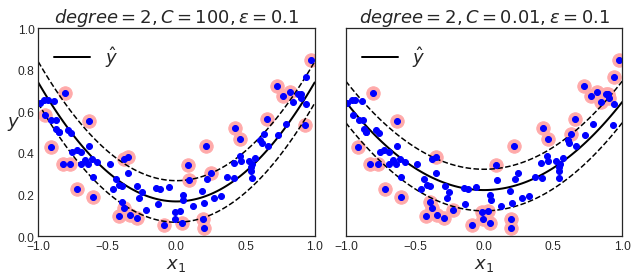

In [0]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")

plt.show()
